In [21]:
import configparser
config = configparser.ConfigParser()
config.read("config.properties")

APIKey = config.get("AzureCredentials","APIKey").strip()
Endpoint = config.get("AzureCredentials","Endpoint").strip()
Deployment = config.get("AzureCredentials","Deployment").strip()
version = config.get("AzureCredentials","version").strip()

Googlekey = config.get('GoogleCred','key')


In [18]:
def multiply(a: int, b: int) -> int:
    """Multiply a and b.

    Args:
        a: first int
        b: second int
    """
    return a * b

# This will be a tool
def add(a: int, b: int) -> int:
    """Adds a and b.

    Args:
        a: first int
        b: second int
    """
    return a + b

def divide(a: int, b: int) -> float:
    """Divide a and b.

    Args:
        a: first int
        b: second int
    """
    return a / b

tools = [add, multiply, divide]

In [ ]:
from langchain_aws import ChatBedrock
import boto3
import requests
boto3.setup_default_session(
    **requests.get("http://localhost:8000/awscred").json()    
)

client = ""
llm = ""
def renew():
  global llm
  global client
  boto3.setup_default_session(
      **requests.get("http://localhost:8000/awscred").json()    
  )
  client = boto3.client(service_name="bedrock-runtime",region_name="us-east-1")
  llm = ChatBedrock(model_id ="anthropic.claude-3-5-sonnet-20240620-v1:0",
                  client = client,
                  model_kwargs={"max_tokens":5000}
                  #   guardrails={"id": "xpqvrjzg8jpl", "version": "5"}
                  )
renew()
print(llm.invoke("HI , i am facing issue i this azure"))


In [ ]:
import configparser
from langchain_openai import AzureChatOpenAI
config = configparser.ConfigParser()
config.read("config.properties")

APIKey = config.get("AzureCredentials","APIKey").strip()
Endpoint = config.get("AzureCredentials","Endpoint").strip()
Deployment = config.get("AzureCredentials","Deployment").strip()
version = config.get("AzureCredentials","version").strip()

llm = AzureChatOpenAI(temperature = 0.2,
                                deployment_name=Deployment,
                                openai_api_version=version,
                                openai_api_key=APIKey, 
                                azure_endpoint=Endpoint)
llm.invoke("Hi")



AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'audio_tokens': 0, 'reasoning_tokens': 0, 'accepted_prediction_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_5154047bf2', 'finish_reason': 'stop', 'logprobs': None, 'content_filter_results': {}}, id='run-18a82cb1-26fa-42d9-bf55-1b7ab6518c63-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [ ]:
import json  

bedrock = boto3.client('bedrock-runtime')
sample_text = "ih"
dimensions = 512
request_body = {
    "inputText": sample_text,
    "dimensions": dimensions
    
}


response = bedrock.invoke_model(
    modelId="amazon.titan-embed-text-v2:0",
    contentType="application/json",
    accept="application/json",
    body=json.dumps(request_body)
)

response_body = json.loads(response['body'].read())

embedding = response_body.get('embedding')
token = response_body.get("inputTextTokenCount")

# google

In [22]:

from langchain_google_genai import ChatGoogleGenerativeAI
import os

os.environ["GOOGLE_API_KEY"] = Googlekey
llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash-thinking-exp-1219")

llm.invoke("what is the weather today in Bangalore")




c:\Users\SIVERMA\Documents\LANGGRAPH\REACT\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


AIMessage(content=['Here\'s my thought process for answering the "weather in Bangalore" request:\n\n1. **Identify the core need:** The user wants to know the current weather conditions in Bangalore. This includes temperature, general conditions (sunny, cloudy, rain), and potentially other details like humidity and wind.\n\n2. **Recognize the need for real-time data:** Weather is dynamic. A pre-programmed answer won\'t work. I need to access a live weather source.\n\n3. **Determine data sources:**  Reliable weather information comes from weather APIs and websites that aggregate meteorological data. Examples include:\n    * OpenWeatherMap\n    * AccuWeather\n    * The Weather Channel\n    * Google Weather (which likely uses data from other sources)\n\n4. **Simulate accessing a weather API (internal process):** Although I don\'t literally "click" on a website, my internal programming allows me to retrieve and process information from these sources. I would prioritize reliable and up-to-da

In [23]:
llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash-exp")

llm.invoke("what is the weather today in Bangalore")

AIMessage(content='I cannot give you the real-time, exact weather in Bangalore right now. Weather conditions change very quickly! \n\nHowever, I can suggest the best way to get the most up-to-date information:\n\n**Here\'s what I recommend:**\n\n* **Use a reliable weather app:** Popular apps like Google Weather, AccuWeather, The Weather Channel, or your phone\'s built-in weather app are excellent resources. They will provide you with the current temperature, humidity, wind speed, chance of rain, and more.\n* **Check a weather website:** Visit a website like Google Weather, Accuweather.com, or another weather site that you trust.\n* **Use your phone\'s assistant:** You can ask Google Assistant or Siri "What\'s the weather in Bangalore?" and they\'ll provide you with the latest information.\n\n**Tips for Getting the Most Accurate Information:**\n\n* **Specify the location:** When using a weather app or website, make sure it\'s set to the correct part of Bangalore (e.g., "Bangalore City,"

In [18]:
import base64
from langchain_core.messages import HumanMessage
from PIL import Image

def perform_google_image_analysis(image_path):

    model = ChatGoogleGenerativeAI(model="gemini-2.0-flash-exp")
    with open(image_path, "rb") as image_file:
        image_data = base64.b64encode(image_file.read()).decode("utf-8")

    message = HumanMessage(
        content=[
            {"type": "text", "text": "describe the image"},
            {
                "type": "image_url",
                "image_url": {"url": f"data:image/jpeg;base64,{image_data}"},
            },
        ],
    )

    response = model.invoke([message])

    return response.content

In [19]:
perform_google_image_analysis("./INPUT/image.jpg")

'The image is a digital design showcasing a 3D text effect.\xa0\n\n\nHere\'s a breakdown:\n\n* **Background:** A solid, deep purple background.\n\n* **Main Text:** The word "PURPLE" is displayed in large, bold, three-dimensional letters. The letters are a lighter shade of purple with a subtle darker purple outline, giving them a beveled or embossed appearance. They cast a shadow on the background, enhancing the 3D effect.\n\n* **Top Text:** Above the main text, smaller text reads "Editable Illustrator Font Effect" in a light purple color. The word "Editable" is in a stylized script font.\n\n* **Bottom Text:** Below the main text, the phrase "EVERYTHING CAN BE CHANGED" is displayed in a smaller, sans-serif font in light purple.\n\n* **Overall Style:** The overall style is clean, modern, and emphasizes the 3D text effect as a design element.  The color palette is monochromatic, using varying shades of purple. The design likely serves as an example or template for a font effect that can b

In [ ]:
llm_with_tools = llm.bind_tools(tools)

In [48]:
llm_with_tools.invoke("what is 4*4+5")

AIMessage(content='', additional_kwargs={'usage': {'prompt_tokens': 543, 'completion_tokens': 135, 'total_tokens': 678}, 'stop_reason': 'tool_use', 'model_id': 'anthropic.claude-3-5-sonnet-20240620-v1:0'}, response_metadata={'usage': {'prompt_tokens': 543, 'completion_tokens': 135, 'total_tokens': 678}, 'stop_reason': 'tool_use', 'model_id': 'anthropic.claude-3-5-sonnet-20240620-v1:0'}, id='run-841785c5-69ac-452b-b1ef-ab8abbccd35f-0', tool_calls=[{'name': 'multiply', 'args': {'a': 4, 'b': 4}, 'id': 'toolu_bdrk_015TqvaXr81soW4eX7HXGnyU', 'type': 'tool_call'}], usage_metadata={'input_tokens': 543, 'output_tokens': 135, 'total_tokens': 678})

In [16]:
from langgraph.graph import MessagesState
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage

# System message
sys_msg = SystemMessage(content="You are a helpful assistant tasked with performing arithmetic on a set of inputs.")

# Node
def assistant(state: MessagesState):
   return {"messages": [llm_with_tools.invoke([sys_msg] + state["messages"])]}

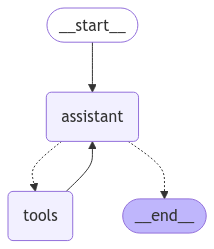

In [17]:
from langgraph.graph import START, StateGraph
from langgraph.prebuilt import tools_condition, ToolNode
from IPython.display import Image, display

# Graph
builder = StateGraph(MessagesState)

# Define nodes: these do the work
builder.add_node("assistant", assistant)
builder.add_node("tools", ToolNode(tools))

# Define edges: these determine how the control flow moves
builder.add_edge(START, "assistant")
builder.add_conditional_edges(
    "assistant",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", "assistant")
react_graph = builder.compile()

# Show
display(Image(react_graph.get_graph(xray=True).draw_mermaid_png()))

In [ ]:
messages = [HumanMessage(content="Add 3 and 4.")]
messages = react_graph.invoke({"messages": messages})
for m in messages['messages']:
    m.pretty_print()

In [12]:
messages = [HumanMessage(content="Multiply that by 2.")]
messages = react_graph.invoke({"messages": messages})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Multiply that by 2.
================================== Ai Message ==================================

I apologize, but I don't have any previous context or value to multiply by 2. To perform the multiplication, I need an initial number. Could you please provide a specific number you'd like to multiply by 2? Once you give me a number, I'll be able to use the multiply function to calculate the result for you.


# Memory

In [13]:
from langgraph.checkpoint.memory import MemorySaver
memory = MemorySaver()
react_graph_memory = builder.compile(checkpointer=memory)

In [14]:
# Specify a thread
config = {"configurable": {"thread_id": "1"}}

# Specify an input
messages = [HumanMessage(content="Add 3 and 4.")]

# Run
messages = react_graph_memory.invoke({"messages": messages},config)
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Add 3 and 4.
================================== Ai Message ==================================
Tool Calls:
  add (toolu_bdrk_01J4ntygHBPJYZx1zgY1Nz8v)
 Call ID: toolu_bdrk_01J4ntygHBPJYZx1zgY1Nz8v
  Args:
    a: 3
    b: 4
================================= Tool Message =================================
Name: add

7
================================== Ai Message ==================================

To answer your request, I used the "add" function to add 3 and 4. The result of this operation is 7.


In [15]:
messages = [HumanMessage(content="Multiply that by 2.")]
messages = react_graph_memory.invoke({"messages": messages}, config)
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Add 3 and 4.
================================== Ai Message ==================================
Tool Calls:
  add (toolu_bdrk_01J4ntygHBPJYZx1zgY1Nz8v)
 Call ID: toolu_bdrk_01J4ntygHBPJYZx1zgY1Nz8v
  Args:
    a: 3
    b: 4
================================= Tool Message =================================
Name: add

7
================================== Ai Message ==================================

To answer your request, I used the "add" function to add 3 and 4. The result of this operation is 7.
================================ Human Message =================================

Multiply that by 2.
================================== Ai Message ==================================
Tool Calls:
  multiply (toolu_bdrk_014yVx5H8VFGArxgBacvEFHr)
 Call ID: toolu_bdrk_014yVx5H8VFGArxgBacvEFHr
  Args:
    a: 7
    b: 2
================================= Tool Message =================================
Name: multiply

14
===

# _______________________________________________________________________________________
# STATES 

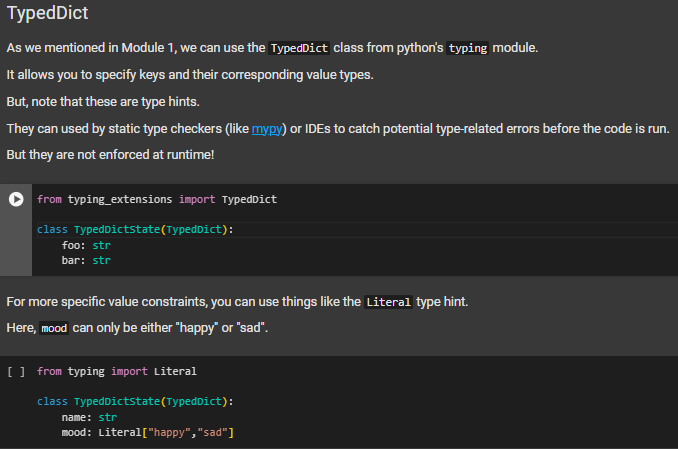

# _______________________________________________________________________________________
# ALTERNATIVE TO TYPEDICT

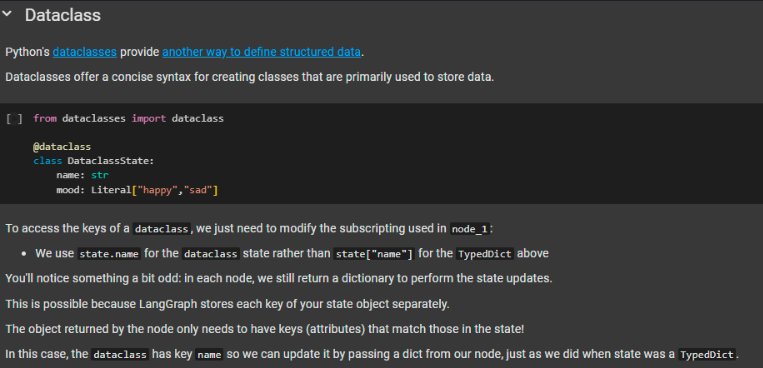

# _______________________________________________________________________________

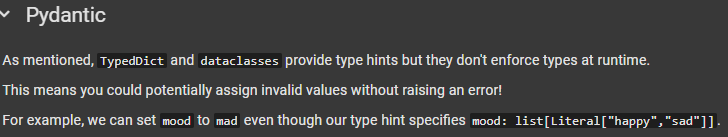

In [41]:
import random
from typing import Literal
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from pydantic import BaseModel, field_validator, ValidationError

class PydanticState(BaseModel):
    name: str
    mood: str 

    @field_validator('mood')
    @classmethod
    def validate_mood(cls, value):
        # Ensure the mood is either "happy" or "sad"
        if value not in ["happy", "sad"]:
            raise ValueError("Each mood must be either 'happy' or 'sad'")
        return value

In [31]:
try:
    state = PydanticState(name="John Doe", mood="mad")
except ValidationError as e:
    print("Validation Error:", e)

Validation Error: 1 validation error for PydanticState
mood
  Value error, Each mood must be either 'happy' or 'sad' [type=value_error, input_value='mad', input_type=str]
    For further information visit https://errors.pydantic.dev/2.9/v/value_error


In [70]:
def node_1(PydanticState):
    print("---Node 1---")
    return {"name": PydanticState.name + " is ... "}

def node_2(PydanticState):
    print("---Node 2---")
    return {"mood": "happy"}

def node_3(PydanticState):
    print("---Node 3---")
    return {"name":PydanticState.name + "with node 3" ,"mood": "sad"}

def decide_mood(PydanticState) -> Literal["node_2", "node_3"]:
        
    # Here, let's just do a 50 / 50 split between nodes 2, 3
    if random.random() < 0.5:

        # 50% of the time, we return Node 2
        return "node_2"
    
    # 50% of the time, we return Node 3
    return "node_3"

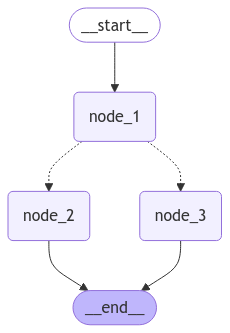

In [71]:
# Build graph
builder = StateGraph(PydanticState)
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)

# Logic
builder.add_edge(START, "node_1")
builder.add_conditional_edges("node_1", decide_mood)
builder.add_edge("node_2", END)
builder.add_edge("node_3", END)

# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [72]:
graph.invoke(PydanticState(name="Lance",mood="sad"))

---Node 1---
---Node 2---


{'name': 'Lance is ... ', 'mood': 'happy'}

# __________________________________________________________________________________________
# TEST

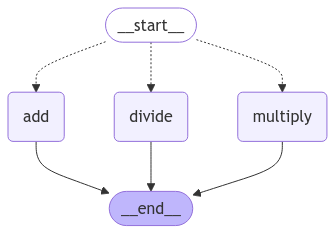

In [80]:
from typing_extensions import TypedDict
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

class State(TypedDict):
    foo: int

def multiply(state):
    print("---Node 1 : multiply ---")
    return {"foo": state['foo'] * 2 }

def add(state):
    print("---Node 2 : add ---")
    return {"foo": state['foo'] + 2}

def divide(state):
    print("---Node 3 : Divide ---")
    return {"foo": state['foo'] - 2}

def decide_flow(PydanticState) -> Literal["divide", "add", "multiply"]:
    x = random.random()
    if  x < 0.3:
        return "divide"
    elif  0.3 <= x and x < .67:
        return "multiply"
    return "add"

# Build graph
builder = StateGraph(State)
builder.add_node("multiply", multiply)
builder.add_node("add", add)
builder.add_node("divide", divide)

# Logic
builder.add_conditional_edges(START,decide_flow)

builder.add_edge("add", END)
builder.add_edge("multiply", END)
builder.add_edge("divide", END)

# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [77]:
graph.invoke({"foo":3}),graph.invoke({"foo":3}),graph.invoke({"foo":3})

---Node 3 : Divide ---
---Node 2 : add ---
---Node 1 : multiply ---


({'foo': 1}, {'foo': 5}, {'foo': 6})

# _____________________________________________________________________________________________

# Annotated

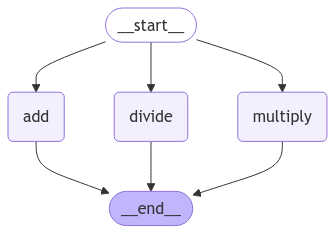

In [81]:

# Build graph
builder = StateGraph(State)
builder.add_node("multiply", multiply)
builder.add_node("add", add)
builder.add_node("divide", divide)

# Logic
builder.add_edge(START, "add")
builder.add_edge(START, "multiply")
builder.add_edge(START, "divide")

builder.add_edge("add", END)
builder.add_edge("multiply", END)
builder.add_edge("divide", END)

# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [83]:
from langgraph.errors import InvalidUpdateError
try:
    graph.invoke({"foo" : 3})
except InvalidUpdateError as e:
    print(f"InvalidUpdateError occurred: {e}")


---Node 1 : multiply ---
---Node 2 : add ---
---Node 3 : Divide ---
InvalidUpdateError occurred: At key 'foo': Can receive only one value per step. Use an Annotated key to handle multiple values.
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/INVALID_CONCURRENT_GRAPH_UPDATE


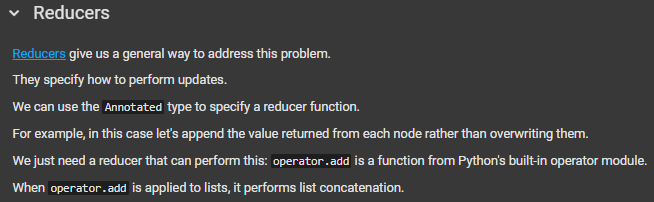

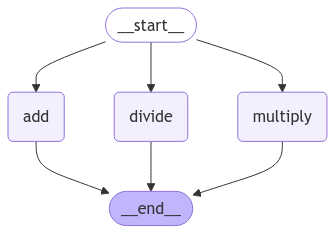

In [114]:
from operator import add
from typing import Annotated

class State(TypedDict):
    foo: Annotated[list[int], add]


def multiply(state):
    print("\n---Node 1 : multiply ---")
    return {"foo": [state['foo'][0] * 2] }

def add(state):
    print("\n---Node 2 : add ---")
    return {"foo": [state['foo'][0] + 2]}

def divide(state):
    print("\n---Node 3 : Divide ---")
    return {"foo": [state['foo'][0] // 2]}

# Build graph
builder = StateGraph(State)
builder.add_node("multiply", multiply)
builder.add_node("add", add)
builder.add_node("divide", divide)

# Logic

builder.add_edge(START, "multiply")
builder.add_edge(START, "add")
builder.add_edge(START, "divide")

builder.add_edge("add", END)
builder.add_edge("multiply", END)
builder.add_edge("divide", END)

# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [115]:
from langgraph.errors import InvalidUpdateError
try:
    print(graph.invoke({"foo" : [10]}))
except InvalidUpdateError as e:
    print(f"InvalidUpdateError occurred: {e}")



---Node 1 : multiply ---

---Node 2 : add ---

---Node 3 : Divide ---
{'foo': [10, 12, 5, 20]}


# CUSTOM REDUCERS

In [116]:
try:
    graph.invoke({"foo" : None})
except TypeError as e:
    print(f"TypeError occurred: {e}")

TypeError occurred: can only concatenate list (not "NoneType") to list


In [119]:
def reduce_list(left: list | None, right: list | None) -> list:
    """Safely combine two lists, handling cases where either or both inputs might be None.

    Args:
        left (list | None): The first list to combine, or None.
        right (list | None): The second list to combine, or None.

    Returns:
        list: A new list containing all elements from both input lists.
               If an input is None, it's treated as an empty list.
    """
    if not left:
        left = []
    if not right:
        right = []
    return left + right

class CustomReducerState(TypedDict):
    foo: Annotated[list[int], reduce_list]

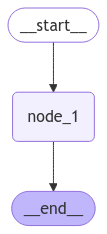

In [132]:
# Build graph
def node_1(state):
    print("---Node 1---")
    return {"foo": [state["foo"][0] + 1] if state["foo"] else [2]}

builder = StateGraph(CustomReducerState)
builder.add_node("node_1", node_1)

# Logic
builder.add_edge(START, "node_1")
builder.add_edge("node_1", END)

# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [135]:

try:
    print(graph.invoke({"foo" : None}))
    # print(graph.invoke({"foo" : [6]}))
except TypeError as e:
    print(f"TypeError occurred: {e}")

---Node 1---
{'foo': [2]}


# _______________________________________________________________________________

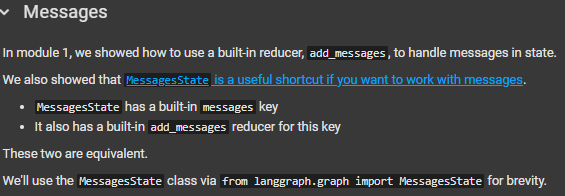

In [137]:
from typing import Annotated
from langgraph.graph import MessagesState
from langchain_core.messages import AnyMessage
from langgraph.graph.message import add_messages

# Define a custom TypedDict that includes a list of messages with add_messages reducer
class CustomMessagesState(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]
    added_key_1: str
    added_key_2: str
    # etc

# Use MessagesState, which includes the messages key with add_messages reducer
class ExtendedMessagesState(MessagesState):
    # Add any keys needed beyond messages, which is pre-built 
    added_key_1: str
    added_key_2: str
    # etc

In [138]:
from langgraph.graph.message import add_messages
from langchain_core.messages import AIMessage, HumanMessage

# Initial state
initial_messages = [AIMessage(content="Hello! How can I assist you?", name="Model"),
                    HumanMessage(content="I'm looking for information on marine biology.", name="Lance")
                   ]

# New message to add
new_message = AIMessage(content="Sure, I can help with that. What specifically are you interested in?", name="Model")

# Test
add_messages(initial_messages , new_message)

[AIMessage(content='Hello! How can I assist you?', additional_kwargs={}, response_metadata={}, name='Model', id='9e15857a-2536-4043-be3b-9facb3b4ae33'),
 HumanMessage(content="I'm looking for information on marine biology.", additional_kwargs={}, response_metadata={}, name='Lance', id='63291d22-187c-475e-bdca-ebcd8a999896'),
 AIMessage(content='Sure, I can help with that. What specifically are you interested in?', additional_kwargs={}, response_metadata={}, name='Model', id='6df54100-ff69-4c5f-a4c5-430dafa0062b')]

# Uttilizing id

In [141]:
# Initial state
initial_messages = [AIMessage(content="Hello! How can I assist you?", name="Model", id="1"),
                    HumanMessage(content="I'm looking for information on marine biology.", name="Lance", id="2")
                   ]

# New message to add
new_message = HumanMessage(content="I'm looking for information on whales, specifically", name="Lance", id="2")

# Test
add_messages(initial_messages , new_message)

[AIMessage(content='Hello! How can I assist you?', additional_kwargs={}, response_metadata={}, name='Model', id='1'),
 HumanMessage(content="I'm looking for information on whales, specifically", additional_kwargs={}, response_metadata={}, name='Lance', id='2')]

# _______________________________________________________________
# Multiple schema
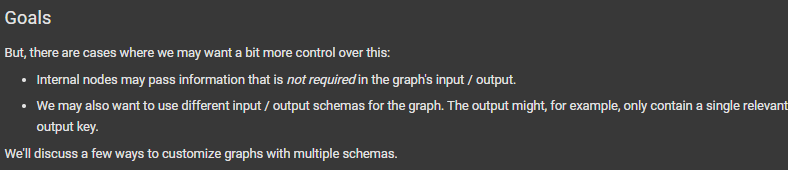

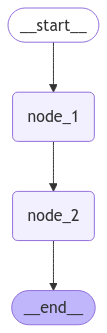

In [144]:
from typing_extensions import TypedDict
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

class OverallState(TypedDict):
    foo: int

class PrivateState(TypedDict):
    baz: int

def node_1(state: OverallState) -> PrivateState:
    print("---Node 1---")
    return {"baz": state['foo'] + 1}

def node_2(state: PrivateState) -> OverallState:
    print("---Node 2---")
    return {"foo": state['baz'] + 1}

# Build graph
builder = StateGraph(OverallState)
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)

# Logic
builder.add_edge(START, "node_1")
builder.add_edge("node_1", "node_2")
builder.add_edge("node_2", END)

# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [145]:
graph.invoke({"foo" : 1})

---Node 1---
---Node 2---


{'foo': 3}

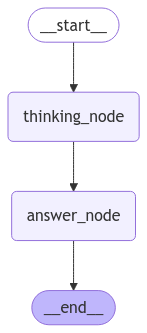

In [160]:
class InputState(TypedDict):
    question: str

class OutputState(TypedDict):
    answer: str

class OverallState(TypedDict):
    question: str
    answer: str
    notes: str

def thinking_node(state: InputState):
    return {"answer": "bye", "notes": "... his name is Lance"}

def answer_node(state: OverallState) -> OutputState:
    return {"answer": "bye Lance"}

graph = StateGraph(OverallState, input=InputState, output=OutputState)
graph.add_node("answer_node", answer_node)
graph.add_node("thinking_node", thinking_node)
graph.add_edge(START, "thinking_node")
graph.add_edge("thinking_node", "answer_node")
graph.add_edge("answer_node", END)

graph = graph.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))


In [161]:

graph.invoke({"question":"hi"})

{'answer': 'bye Lance'}

# TRIMING

In [21]:
from pprint import pprint
from langchain_core.messages import AIMessage, HumanMessage
messages = [AIMessage(f"So you said you were researching ocean mammals?", name="Bot")]
messages.append(HumanMessage(f"Yes, I know about whales. But what others should I learn about?", name="Lance"))

for m in messages:
    m.pretty_print()

================================== Ai Message ==================================
Name: Bot

So you said you were researching ocean mammals?
================================ Human Message =================================
Name: Lance

Yes, I know about whales. But what others should I learn about?


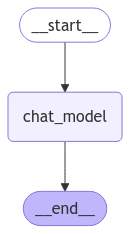

In [22]:
from IPython.display import Image, display
from langgraph.graph import MessagesState
from langgraph.graph import StateGraph, START, END

# Node
def chat_model_node(state: MessagesState):
    return {"messages": llm.invoke(state["messages"])}

# Build graph
builder = StateGraph(MessagesState)
builder.add_node("chat_model", chat_model_node)
builder.add_edge(START, "chat_model")
builder.add_edge("chat_model", END)
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [23]:
output = graph.invoke({'messages': messages})
for m in output['messages']:
    m.pretty_print()

================================== Ai Message ==================================
Name: Bot

So you said you were researching ocean mammals?
================================ Human Message =================================
Name: Lance

Yes, I know about whales. But what others should I learn about?
================================== Ai Message ==================================

In addition to whales, there are several fascinating ocean mammals you might want to learn about:

1. **Dolphins**: Known for their intelligence and playful behavior, dolphins are social animals that often live in pods. The bottlenose dolphin is one of the most well-known species.

2. **Porpoises**: Similar to dolphins but generally smaller and with a different snout shape, porpoises are also social creatures found in various ocean habitats.

3. **Seals**: There are many species of seals, including harbor seals and elephant seals. They are known for their playful nature and can often be seen lounging on rocks or 

# ____________________________________________________________________________________________________
# FOR TRACING

In [191]:
import os, getpass

os.environ["LANGCHAIN_API_KEY"] = "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"
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "pr-dependable-agent-85"

# _______________________________________________________________________________________________________________
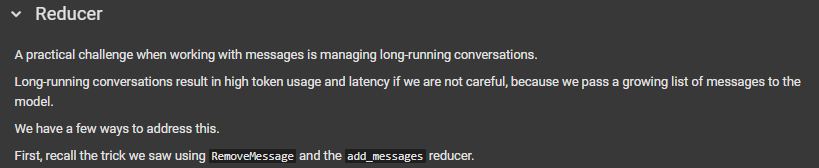

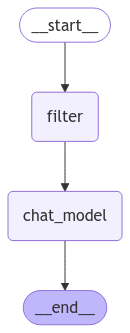

In [24]:
from langchain_core.messages import RemoveMessage

# Nodes
def filter_messages(state: MessagesState):
    # Delete all but the 2 most recent messages
    delete_messages = [RemoveMessage(id=m.id) for m in state["messages"][:-2]]
    return {"messages": delete_messages}

def chat_model_node(state: MessagesState):    
    return {"messages": [llm.invoke(state["messages"])]}

# Build graph
builder = StateGraph(MessagesState)
builder.add_node("filter", filter_messages)
builder.add_node("chat_model", chat_model_node)
builder.add_edge(START, "filter")
builder.add_edge("filter", "chat_model")
builder.add_edge("chat_model", END)
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [26]:
# renew()
llm.invoke("hi")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': None, 'prompt_tokens_details': None}, 'model_name': 'gpt-4o-mini', 'system_fingerprint': 'fp_04751d0b65', 'finish_reason': 'stop', 'logprobs': None, 'content_filter_results': {}}, id='run-864dba57-9789-456c-93e8-1b79aa33818a-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {}, 'output_token_details': {}})

In [27]:
# Message list with a preamble
messages = [AIMessage("Hi.", name="Bot", id="1")]
messages.append(HumanMessage("Hi.", name="Lance", id="2"))
messages.append(AIMessage("So you said you were researching ocean mammals?", name="Bot", id="3"))
messages.append(HumanMessage("Yes, I know about whales. But what others should I learn about?", name="Lance", id="4"))

# Invoke
output = graph.invoke({'messages': messages})
for m in output['messages']:
    m.pretty_print()

================================== Ai Message ==================================
Name: Bot

So you said you were researching ocean mammals?
================================ Human Message =================================
Name: Lance

Yes, I know about whales. But what others should I learn about?
================================== Ai Message ==================================

In addition to whales, there are several other fascinating ocean mammals you might want to learn about:

1. **Dolphins**: Known for their intelligence and playful behavior, dolphins are part of the cetacean family, which includes whales and porpoises. The bottlenose dolphin is one of the most well-known species.

2. **Porpoises**: Similar to dolphins but generally smaller and with different teeth and body shapes. They are less acrobatic than dolphins but are still very interesting creatures.

3. **Seals**: These pinnipeds are divided into two families: true seals (phocids) and eared seals (otariids). They are kno

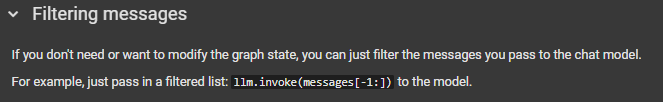

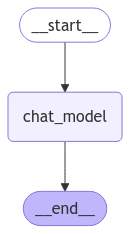

In [9]:
# Node
from langsmith import traceable

@traceable # Auto-trace this function
def chat_model_node(state: MessagesState):
    return {"messages": [llm.invoke(state["messages"][-1:])]}

# Build graph
builder = StateGraph(MessagesState)
builder.add_node("chat_model", chat_model_node)
builder.add_edge(START, "chat_model")
builder.add_edge("chat_model", END)
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [28]:
messages.append(output['messages'][-1])
messages.append(HumanMessage(f"Tell me more about Narwhals!", name="Lance"))

In [29]:
# Invoke, using message filtering
output = graph.invoke({'messages': messages})
for m in output['messages']:
    m.pretty_print()

================================== Ai Message ==================================

In addition to whales, there are several other fascinating ocean mammals you might want to learn about:

1. **Dolphins**: Known for their intelligence and playful behavior, dolphins are part of the cetacean family, which includes whales and porpoises. The bottlenose dolphin is one of the most well-known species.

2. **Porpoises**: Similar to dolphins but generally smaller and with different teeth and body shapes. They are less acrobatic than dolphins but are still very interesting creatures.

3. **Seals**: These pinnipeds are divided into two families: true seals (phocids) and eared seals (otariids). They are known for their playful nature and can be found in various habitats.

4. **Sea Lions**: A type of eared seal, sea lions are known for their loud barks and social behavior. They are often seen in large groups on beaches or rocky shores.

5. **Walruses**: Recognizable by their long tusks and whiskers, 

# TOKEN BASED

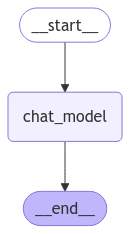

In [40]:
from langchain_core.messages import trim_messages
from langgraph.graph import MessagesState
from langgraph.graph import START, StateGraph,END
from langgraph.prebuilt import tools_condition, ToolNode
from IPython.display import Image, display
# Node
def chat_model_node(state: MessagesState):
    messages = trim_messages(
            state["messages"],
            max_tokens=100,
            strategy="last",
            token_counter=llm,
            allow_partial=False,
        )
    return {"messages": [llm.invoke(messages)]}

# Build graph
builder = StateGraph(MessagesState)
builder.add_node("chat_model", chat_model_node)
builder.add_edge(START, "chat_model")
builder.add_edge("chat_model", END)
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [41]:
messages.append(output['messages'][-1])
messages.append(HumanMessage(f"Tell me where Orcas live!", name="Lance"))

In [42]:
messages

[AIMessage(content='Hi.', additional_kwargs={}, response_metadata={}, name='Bot', id='1'),
 HumanMessage(content='Hi.', additional_kwargs={}, response_metadata={}, name='Lance', id='2'),
 AIMessage(content='So you said you were researching ocean mammals?', additional_kwargs={}, response_metadata={}, name='Bot', id='3'),
 HumanMessage(content='Yes, I know about whales. But what others should I learn about?', additional_kwargs={}, response_metadata={}, name='Lance', id='4'),
 AIMessage(content='In addition to whales, there are several other fascinating ocean mammals you might want to learn about:\n\n1. **Dolphins**: Known for their intelligence and playful behavior, dolphins are part of the cetacean family, which includes whales and porpoises. The bottlenose dolphin is one of the most well-known species.\n\n2. **Porpoises**: Similar to dolphins but generally smaller and with different teeth and body shapes. They are less acrobatic than dolphins but are still very interesting creatures.\n

In [43]:

# Invoke, using message trimming in the chat_model_node 
messages_out_trim = graph.invoke({'messages': messages})

# CHATBOT SUMMARY

In [26]:
renew()

In [27]:
from langgraph.graph import MessagesState
class State(MessagesState):
    summary: str

In [28]:
from langchain_core.messages import SystemMessage, HumanMessage, RemoveMessage

# Define the logic to call the model
def call_model(state: State):
    
    # Get summary if it exists
    summary = state.get("summary", "")

    # If there is summary, then we add it
    if summary:
        
        # Add summary to system message
        system_message = f"Summary of conversation earlier: {summary}"

        # Append summary to any newer messages
        messages = [SystemMessage(content=system_message)] + state["messages"]
    
    else:
        messages = state["messages"]
    
    response = llm.invoke(messages)
    return {"messages": response}

In [37]:
def summarize_conversation(state: State):
    
    # First, we get any existing summary
    summary = state.get("summary", "")

    # Create our summarization prompt 
    if summary:
        
        # A summary already exists
        summary_message = (
            f"This is summary of the conversation to date: {summary}\n\n"
            "Extend the summary by taking into account the new messages above:"
        )
        
    else:
        summary_message = "Create a summary of the conversation above:"

    # Add prompt to our history
    messages = state["messages"] + [HumanMessage(content=summary_message)]
    print("summary",messages)
    response = llm.invoke(messages)
    
    # Delete all but the 2 most recent messages
    delete_messages = [RemoveMessage(id=m.id) for m in state["messages"][:-2]]
    return {"summary": response.content, "messages": delete_messages}

In [38]:
from langgraph.graph import END
# Determine whether to end or summarize the conversation
def should_continue(state: State):
    
    """Return the next node to execute."""
    
    messages = state["messages"]
    
    # If there are more than six messages, then we summarize the conversation
    if len(messages) > 6:
        return "summarize_conversation"
    
    # Otherwise we can just end
    return END

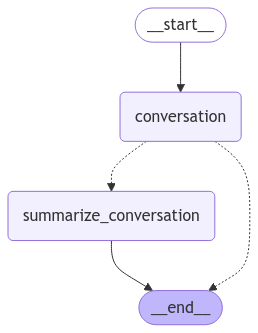

In [39]:
from IPython.display import Image, display
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import StateGraph, START

# Define a new graph
workflow = StateGraph(State)
workflow.add_node("conversation", call_model)
workflow.add_node(summarize_conversation)

# Set the entrypoint as conversation
workflow.add_edge(START, "conversation")
workflow.add_conditional_edges("conversation", should_continue)
workflow.add_edge("summarize_conversation", END)

# Compile
memory = MemorySaver()
graph = workflow.compile(checkpointer=memory)
display(Image(graph.get_graph().draw_mermaid_png()))

In [40]:
# Create a thread
config = {"configurable": {"thread_id": "1"}}

# Start conversation
input_message = HumanMessage(content="hi! I'm Lance")
output = graph.invoke({"messages": [input_message]}, config) 
for m in output['messages'][-1:]:
    m.pretty_print()

input_message = HumanMessage(content="what's my name?")
output = graph.invoke({"messages": [input_message]}, config) 
for m in output['messages'][-1:]:
    m.pretty_print()

input_message = HumanMessage(content="i like the 49ers!")
output = graph.invoke({"messages": [input_message]}, config) 
for m in output['messages'][-1:]:
    m.pretty_print()

================================== Ai Message ==================================

Hello Lance! It's nice to meet you. I'm an AI assistant created by Anthropic to be helpful, harmless, and honest. How can I help you today?
================================== Ai Message ==================================

Your name is Lance, as you introduced yourself at the beginning of our conversation.
================================== Ai Message ==================================

That's great to hear, Lance! The San Francisco 49ers are a popular NFL team with a rich history. They've won five Super Bowl championships and have had many legendary players over the years. Are you a long-time fan? Do you have any favorite players or memorable games you particularly enjoy? Feel free to share more about your interest in the 49ers if you'd like!


In [33]:
output["messages"][-1].content

"That's great, Lance! The San Francisco 49ers are a popular NFL team with a rich history. They've won five Super Bowl championships and have had many legendary players like Joe Montana, Jerry Rice, and Steve Young. \n\nAre you a long-time fan or did you start following them recently? Do you have a favorite player on the current team? I'd be happy to discuss more about the 49ers or NFL football in general if you're interested!"

In [41]:
graph.get_state(config).values.get("summary","")

''

In [42]:
input_message = HumanMessage(content="i like Nick Bosa, isn't he the highest paid defensive player?")
output = graph.invoke({"messages": [input_message]}, config) 
for m in output['messages'][-1:]:
    m.pretty_print()

summary [HumanMessage(content="hi! I'm Lance", additional_kwargs={}, response_metadata={}, id='e99b6800-9cb1-4fea-a37e-4a3a7a2f22bf'), AIMessage(content="Hello Lance! It's nice to meet you. I'm an AI assistant created by Anthropic to be helpful, harmless, and honest. How can I help you today?", additional_kwargs={'usage': {'prompt_tokens': 12, 'completion_tokens': 40, 'total_tokens': 52}, 'stop_reason': 'end_turn', 'model_id': 'anthropic.claude-3-5-sonnet-20240620-v1:0'}, response_metadata={'usage': {'prompt_tokens': 12, 'completion_tokens': 40, 'total_tokens': 52}, 'stop_reason': 'end_turn', 'model_id': 'anthropic.claude-3-5-sonnet-20240620-v1:0'}, id='run-64eac9ec-4e05-4017-a79a-21659effff15-0', usage_metadata={'input_tokens': 12, 'output_tokens': 40, 'total_tokens': 52}), HumanMessage(content="what's my name?", additional_kwargs={}, response_metadata={}, id='d7cac844-afcb-4135-82b4-fd1561b5abda'), AIMessage(content='Your name is Lance, as you introduced yourself at the beginning of 

In [36]:
graph.get_state(config).values.get("summary","")

"Here's a summary of our conversation:\n\n1. You introduced yourself as Lance.\n2. You expressed your support for the San Francisco 49ers NFL team.\n3. You mentioned liking Nick Bosa, a defensive player for the 49ers.\n4. You asked if Nick Bosa was the highest-paid defensive player in the NFL.\n5. I explained that while Nick Bosa recently signed a massive contract extension making him one of the highest-paid defensive players, Aaron Donald of the LA Rams currently holds the title for highest average annual value.\n6. I provided details about Bosa's contract: $170 million over five years, averaging $34 million per year, which is the highest average annual value for a defensive player in NFL history.\n7. I also mentioned T.J. Watt's contract for comparison and emphasized Bosa's importance to the 49ers' defense."

# LONG TERM MEMORY

In [4]:
# !pip install langgraph-checkpoint-sqlite

In [3]:
renew()

In [3]:
import sqlite3
# In memory
conn = sqlite3.connect(":memory:", check_same_thread = False)

In [15]:
# pull file if it doesn't exist and connect to local db
# !mkdir -p state_db && [ ! -f state_db/example.db ] && wget -P state_db https://github.com/langchain-ai/langchain-academy/raw/main/module-2/state_db/example.db

db_path = "state_db/example.db"
conn = sqlite3.connect(db_path, check_same_thread=False)

In [16]:
# Here is our checkpointer 
from langgraph.checkpoint.sqlite import SqliteSaver
memory = SqliteSaver(conn)

In [17]:
from langchain_core.messages import SystemMessage, HumanMessage, RemoveMessage

from langgraph.graph import END
from langgraph.graph import MessagesState

class State(MessagesState):
    summary: str

# Define the logic to call the model
def call_model(state: State):
    
    # Get summary if it exists
    summary = state.get("summary", "")

    # If there is summary, then we add it
    if summary:
        
        # Add summary to system message
        system_message = f"Summary of conversation earlier: {summary}"

        # Append summary to any newer messages
        messages = [SystemMessage(content=system_message)] + state["messages"]
    
    else:
        messages = state["messages"]
    
    response = llm.invoke(messages)
    return {"messages": response}

def summarize_conversation(state: State):
    
    # First, we get any existing summary
    summary = state.get("summary", "")

    # Create our summarization prompt 
    if summary:
        
        # A summary already exists
        summary_message = (
            f"This is summary of the conversation to date: {summary}\n\n"
            "Extend the summary by taking into account the new messages above:"
        )
        
    else:
        summary_message = "Create a summary of the conversation above:"

    # Add prompt to our history
    messages = state["messages"] + [HumanMessage(content=summary_message)]
    response = llm.invoke(messages)
    
    # Delete all but the 2 most recent messages
    delete_messages = [RemoveMessage(id=m.id) for m in state["messages"][:-2]]
    return {"summary": response.content, "messages": delete_messages}

# Determine whether to end or summarize the conversation
def should_continue(state: State):
    
    """Return the next node to execute."""
    
    messages = state["messages"]
    
    # If there are more than six messages, then we summarize the conversation
    if len(messages) > 6:
        return "summarize_conversation"
    
    # Otherwise we can just end
    return END

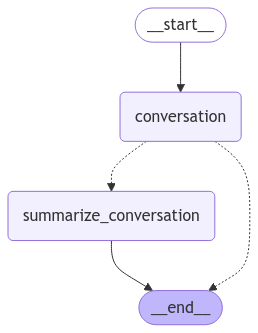

In [19]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START

# Define a new graph
workflow = StateGraph(State)
workflow.add_node("conversation", call_model)
workflow.add_node(summarize_conversation)

# Set the entrypoint as conversation
workflow.add_edge(START, "conversation")
workflow.add_conditional_edges("conversation", should_continue)
workflow.add_edge("summarize_conversation", END)

# Compile
graph = workflow.compile(checkpointer=memory)
display(Image(graph.get_graph().draw_mermaid_png()))

In [9]:
# Create a thread
config = {"configurable": {"thread_id": "1"}}

# Start conversation
input_message = HumanMessage(content="hi! I'm Lance")
output = graph.invoke({"messages": [input_message]}, config) 
for m in output['messages'][-1:]:
    m.pretty_print()

input_message = HumanMessage(content="what's my name?")
output = graph.invoke({"messages": [input_message]}, config) 
for m in output['messages'][-1:]:
    m.pretty_print()

input_message = HumanMessage(content="i like the 49ers!")
output = graph.invoke({"messages": [input_message]}, config) 
for m in output['messages'][-1:]:
    m.pretty_print()

================================== Ai Message ==================================

Hello Lance! It's nice to meet you again. I remember you mentioning that you like the 49ers earlier. Is there anything in particular you'd like to chat about today? I'm here to help with any questions you might have or just to engage in friendly conversation on topics that interest you.
================================== Ai Message ==================================

Your name is Lance. You've introduced yourself as Lance both at the beginning of our conversation and just now.
================================== Ai Message ==================================

Yes, you've mentioned that before! The 49ers are certainly a popular team. Since you've brought them up again, I'd love to hear more about your interest in the team:

1. How long have you been a 49ers fan?
2. Do you have a favorite player on the current roster?
3. What do you think about their performance in recent seasons?
4. Have you ever been to a g

In [18]:
config = {"configurable": {"thread_id": "1"}}
graph_state = graph.get_state(config)
graph_state

StateSnapshot(values={'messages': [HumanMessage(content="hi! I'm Lance", additional_kwargs={}, response_metadata={}, id='f88cb00a-e4da-40ea-a86d-33cb65fc6bf1'), AIMessage(content="Hello Lance! It's nice to meet you. I'm an AI assistant created by Anthropic. How can I help you today? Feel free to ask me anything you'd like!", additional_kwargs={'usage': {'prompt_tokens': 12, 'completion_tokens': 41, 'total_tokens': 53}, 'stop_reason': 'end_turn', 'model_id': 'anthropic.claude-3-5-sonnet-20240620-v1:0'}, response_metadata={'usage': {'prompt_tokens': 12, 'completion_tokens': 41, 'total_tokens': 53}, 'stop_reason': 'end_turn', 'model_id': 'anthropic.claude-3-5-sonnet-20240620-v1:0'}, id='run-f0c4d2c7-79cd-4488-acfd-4472ab0f6eae-0', usage_metadata={'input_tokens': 12, 'output_tokens': 41, 'total_tokens': 53}), HumanMessage(content="what's my name?", additional_kwargs={}, response_metadata={}, id='41976b58-ec02-4fd2-9059-34d9cabf4986'), AIMessage(content='Your name is Lance, based on what yo

In [9]:
# Create a thread
config = {"configurable": {"thread_id": "1"}}
graph_state = graph.get_state(config)
graph_state

StateSnapshot(values={'messages': [HumanMessage(content="hi! I'm Lance", additional_kwargs={}, response_metadata={}, id='be0e69a7-4c91-4f3f-b3f8-c4e12ac32542'), AIMessage(content="Hello Lance! It's nice to meet you again. I remember you mentioning that you like the 49ers earlier. Is there anything in particular you'd like to chat about today? I'm here to help with any questions you might have or just to engage in friendly conversation on topics that interest you.", additional_kwargs={'usage': {'prompt_tokens': 193, 'completion_tokens': 65, 'total_tokens': 258}, 'stop_reason': 'end_turn', 'model_id': 'anthropic.claude-3-5-sonnet-20240620-v1:0'}, response_metadata={'usage': {'prompt_tokens': 193, 'completion_tokens': 65, 'total_tokens': 258}, 'stop_reason': 'end_turn', 'model_id': 'anthropic.claude-3-5-sonnet-20240620-v1:0'}, id='run-0060cce7-4746-4dd9-8618-84f23448a6bf-0', usage_metadata={'input_tokens': 193, 'output_tokens': 65, 'total_tokens': 258}), HumanMessage(content="what's my na

# STREAMING

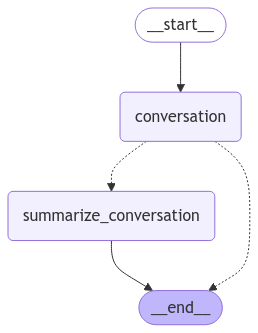

In [44]:
from IPython.display import Image, display

from langchain_core.messages import SystemMessage, HumanMessage, RemoveMessage
from langchain_core.runnables import RunnableConfig

from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import StateGraph, START, END
from langgraph.graph import MessagesState



# State 
class State(MessagesState):
    summary: str

# Define the logic to call the model
def call_model(state: State, config: RunnableConfig):
    
    # Get summary if it exists
    summary = state.get("summary", "")

    # If there is summary, then we add it
    if summary:
        
        # Add summary to system message
        system_message = f"Summary of conversation earlier: {summary}"

        # Append summary to any newer messages
        messages = [SystemMessage(content=system_message)] + state["messages"]
    
    else:
        messages = state["messages"]
    
    response = llm.invoke(messages, config)
    return {"messages": response}

def summarize_conversation(state: State):
    
    # First, we get any existing summary
    summary = state.get("summary", "")

    # Create our summarization prompt 
    if summary:
        
        # A summary already exists
        summary_message = (
            f"This is summary of the conversation to date: {summary}\n\n"
            "Extend the summary by taking into account the new messages above:"
        )
        
    else:
        summary_message = "Create a summary of the conversation above:"

    # Add prompt to our history
    messages = state["messages"] + [HumanMessage(content=summary_message)]
    response = llm.invoke(messages)
    
    # Delete all but the 2 most recent messages
    delete_messages = [RemoveMessage(id=m.id) for m in state["messages"][:-2]]
    return {"summary": response.content, "messages": delete_messages}

# Determine whether to end or summarize the conversation
def should_continue(state: State):
    
    """Return the next node to execute."""
    
    messages = state["messages"]
    
    # If there are more than six messages, then we summarize the conversation
    if len(messages) > 6:
        return "summarize_conversation"
    
    # Otherwise we can just end
    return END

# Define a new graph
workflow = StateGraph(State)
workflow.add_node("conversation", call_model)
workflow.add_node(summarize_conversation)

# Set the entrypoint as conversation
workflow.add_edge(START, "conversation")
workflow.add_conditional_edges("conversation", should_continue)
workflow.add_edge("summarize_conversation", END)

# Compile
memory = MemorySaver()
graph = workflow.compile(checkpointer=memory)
display(Image(graph.get_graph().draw_mermaid_png()))

In [46]:
# Create a thread
config = {"configurable": {"thread_id": "1"}}

# Start conversation
for chunk in graph.stream({"messages": [HumanMessage(content="hi! I'm Lance, what is the best sports give an detail analysis")]}, config, stream_mode="updates"):
    print(chunk)

{'conversation': {'messages': AIMessage(content='Hi Lance! The "best" sport can vary greatly depending on personal preferences, cultural significance, and various other factors. However, I can provide a detailed analysis of a few popular sports, highlighting their characteristics, benefits, and global impact. Here are three widely regarded sports: soccer (football), basketball, and cricket.\n\n### 1. Soccer (Football)\n\n**Overview:**\n- Soccer, known as football outside North America, is the world\'s most popular sport, played by over 250 million players in more than 200 countries.\n- The game is played between two teams of 11 players each, with the objective of scoring goals by getting a ball into the opposing team\'s net.\n\n**Characteristics:**\n- **Field Size:** A standard soccer field is about 100-110 meters long and 64-75 meters wide.\n- **Duration:** A match consists of two 45-minute halves, with a 15-minute halftime break.\n- **Equipment:** The primary equipment includes a sph

In [47]:
# Start conversation
for chunk in graph.stream({"messages": [HumanMessage(content="hi! I'm Lance")]}, config, stream_mode="updates"):
    chunk['conversation']["messages"].pretty_print()

================================== Ai Message ==================================

Hi again, Lance! How can I help you today?


In [49]:
# Start conversation, again
config = {"configurable": {"thread_id": "2"}}

# Start conversation
input_message = HumanMessage(content="which is the biggest city in the world")
for event in graph.stream({"messages": [input_message]}, config, stream_mode="values"):
    for m in event['messages']:
        m.pretty_print()
    print("---"*25)

================================ Human Message =================================

hi! I'm Lance
================================== Ai Message ==================================

Hi Lance! How can I assist you today?
================================ Human Message =================================

which is the biggest city in the world
---------------------------------------------------------------------------
================================ Human Message =================================

hi! I'm Lance
================================== Ai Message ==================================

Hi Lance! How can I assist you today?
================================ Human Message =================================

which is the biggest city in the world
================================== Ai Message ==================================

The title of the "biggest city in the world" can refer to different metrics, such as population or land area. 

1. **By Population**: As of my last update, Tokyo, Japan

In [ ]:
config = {"configurable": {"thread_id": "3"}}
input_message = HumanMessage(content="Tell me about the 49ers NFL team")
async for event in graph.astream_events({"messages": [input_message]}, config, version="v2"):
    print(f"Node: {event['metadata'].get('langgraph_node','')}. Type: {event['event']}. Name: {event['name']}")

In [51]:
node_to_stream = 'conversation'
config = {"configurable": {"thread_id": "4"}}
input_message = HumanMessage(content="Tell me about the 49ers NFL team")
async for event in graph.astream_events({"messages": [input_message]}, config, version="v2"):
    # Get chat model tokens from a particular node 
    if event["event"] == "on_chat_model_stream" and event['metadata'].get('langgraph_node','') == node_to_stream:
        print(event["data"])

{'chunk': AIMessageChunk(content='', additional_kwargs={}, response_metadata={}, id='run-d322d134-71f2-4762-aed3-e5451cdb08c3')}
{'chunk': AIMessageChunk(content='The', additional_kwargs={}, response_metadata={}, id='run-d322d134-71f2-4762-aed3-e5451cdb08c3')}
{'chunk': AIMessageChunk(content=' San', additional_kwargs={}, response_metadata={}, id='run-d322d134-71f2-4762-aed3-e5451cdb08c3')}
{'chunk': AIMessageChunk(content=' Francisco', additional_kwargs={}, response_metadata={}, id='run-d322d134-71f2-4762-aed3-e5451cdb08c3')}
{'chunk': AIMessageChunk(content=' ', additional_kwargs={}, response_metadata={}, id='run-d322d134-71f2-4762-aed3-e5451cdb08c3')}
{'chunk': AIMessageChunk(content='49', additional_kwargs={}, response_metadata={}, id='run-d322d134-71f2-4762-aed3-e5451cdb08c3')}
{'chunk': AIMessageChunk(content='ers', additional_kwargs={}, response_metadata={}, id='run-d322d134-71f2-4762-aed3-e5451cdb08c3')}
{'chunk': AIMessageChunk(content=' are', additional_kwargs={}, response_me

In [52]:
config = {"configurable": {"thread_id": "5"}}
input_message = HumanMessage(content="Tell me about the 49ers NFL team")
async for event in graph.astream_events({"messages": [input_message]}, config, version="v2"):
    # Get chat model tokens from a particular node 
    if event["event"] == "on_chat_model_stream" and event['metadata'].get('langgraph_node','') == node_to_stream:
        data = event["data"]
        print(data["chunk"].content, end="|")

|The| San| Francisco| |49|ers| are| a| professional| American| football| team| based| in| San| Francisco|,| California|.| They| are| a| member| of| the| National| Football| League| (|NFL|)| and| compete| in| the| league|'s| National| Football| Conference| (|N|FC|)| West| division|.| Here| are| some| key| points| about| the| team|:

|###| History|
|-| **|Founded|**|:| The| |49|ers| were| established| in| |194|6| and| were| one| of| the| original| teams| in| the| All|-Amer|ica| Football| Conference| (|AA|FC|)| before| joining| the| NFL| in| |194|9|.
|-| **|Name| Origin|**|:| The| team's| name| refers| to| the| prospect|ors| who| flock|ed| to| California| during| the| |184|9| Gold| Rush|.

|###| Ach|ievements|
|-| **|Super| Bowl| Championships|**|:| The| |49|ers| have| won| five| Super| Bowl| titles| (|Super| Bowl| XVI|,| XIX|,| XX|III|,| XX|IV|,| and| XX|IX|),| making| them| one| of| the| most| successful| franchises| in| NFL| history|.
|-| **|Hall| of| Fam|ers|**|:| The| team| has| prod

# BreakPoint

In [53]:
from langchain_openai import ChatOpenAI

def multiply(a: int, b: int) -> int:
    """Multiply a and b.

    Args:
        a: first int
        b: second int
    """
    return a * b

# This will be a tool
def add(a: int, b: int) -> int:
    """Adds a and b.

    Args:
        a: first int
        b: second int
    """
    return a + b

def divide(a: int, b: int) -> float:
    """Adds a and b.

    Args:
        a: first int
        b: second int
    """
    return a / b

tools = [add, multiply, divide]

llm_with_tools = llm.bind_tools(tools)

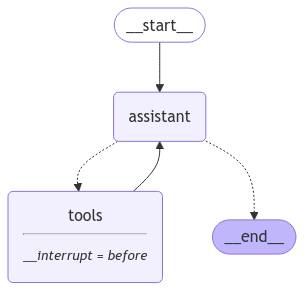

In [54]:
from IPython.display import Image, display

from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import MessagesState
from langgraph.graph import START, StateGraph
from langgraph.prebuilt import tools_condition, ToolNode

from langchain_core.messages import AIMessage, HumanMessage, SystemMessage

# System message
sys_msg = SystemMessage(content="You are a helpful assistant tasked with performing arithmetic on a set of inputs.")

# Node
def assistant(state: MessagesState):
   return {"messages": [llm_with_tools.invoke([sys_msg] + state["messages"])]}

# Graph
builder = StateGraph(MessagesState)

# Define nodes: these do the work
builder.add_node("assistant", assistant)
builder.add_node("tools", ToolNode(tools))

# Define edges: these determine the control flow
builder.add_edge(START, "assistant")
builder.add_conditional_edges(
    "assistant",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", "assistant")

memory = MemorySaver()
graph = builder.compile(interrupt_before=["tools"], checkpointer=memory)

# Show
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))

In [55]:
# Input
initial_input = {"messages": HumanMessage(content="Multiply 2 and 3")}

# Thread
thread = {"configurable": {"thread_id": "1"}}

# Run the graph until the first interruption
for event in graph.stream(initial_input, thread, stream_mode="values"):
    event['messages'][-1].pretty_print()

================================ Human Message =================================

Multiply 2 and 3
================================== Ai Message ==================================
Tool Calls:
  multiply (call_h5Ni68GIKZA7NtLn78XafmyP)
 Call ID: call_h5Ni68GIKZA7NtLn78XafmyP
  Args:
    a: 2
    b: 3


In [56]:
state = graph.get_state(thread)
state.next

('tools',)

Now, we'll introduce a nice trick.

When we invoke the graph with None, it will just continue from the last state checkpoint!

In [57]:
for event in graph.stream(None, thread, stream_mode="values"):
    event['messages'][-1].pretty_print()

================================== Ai Message ==================================
Tool Calls:
  multiply (call_h5Ni68GIKZA7NtLn78XafmyP)
 Call ID: call_h5Ni68GIKZA7NtLn78XafmyP
  Args:
    a: 2
    b: 3
================================= Tool Message =================================
Name: multiply

6
================================== Ai Message ==================================

The result of multiplying 2 and 3 is 6.


In [58]:
# Input
initial_input = {"messages": HumanMessage(content="Multiply 2 and 3")}

# Thread
thread = {"configurable": {"thread_id": "2"}}

# Run the graph until the first interruption
for event in graph.stream(initial_input, thread, stream_mode="values"):
    event['messages'][-1].pretty_print()

# Get user feedback
user_approval = input("Do you want to call the tool? (yes/no): ")

# Check approval
if user_approval.lower() == "yes":
    
    # If approved, continue the graph execution
    for event in graph.stream(None, thread, stream_mode="values"):
        event['messages'][-1].pretty_print()
        
else:
    print("Operation cancelled by user.")

================================ Human Message =================================

Multiply 2 and 3
================================== Ai Message ==================================
Tool Calls:
  multiply (call_YPPwVH97MCqHte7UMatGSvGT)
 Call ID: call_YPPwVH97MCqHte7UMatGSvGT
  Args:
    a: 2
    b: 3
================================== Ai Message ==================================
Tool Calls:
  multiply (call_YPPwVH97MCqHte7UMatGSvGT)
 Call ID: call_YPPwVH97MCqHte7UMatGSvGT
  Args:
    a: 2
    b: 3
================================= Tool Message =================================
Name: multiply

6
================================== Ai Message ==================================

The result of multiplying 2 and 3 is 6.


# Edit-State-Human-Feedback

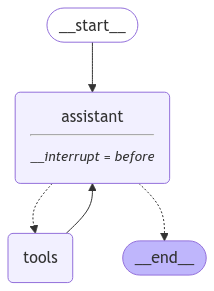

In [59]:
from IPython.display import Image, display

from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import MessagesState
from langgraph.graph import START, StateGraph
from langgraph.prebuilt import tools_condition, ToolNode

from langchain_core.messages import HumanMessage, SystemMessage

# System message
sys_msg = SystemMessage(content="You are a helpful assistant tasked with performing arithmetic on a set of inputs.")

# Node
def assistant(state: MessagesState):
   return {"messages": [llm_with_tools.invoke([sys_msg] + state["messages"])]}

# Graph
builder = StateGraph(MessagesState)

# Define nodes: these do the work
builder.add_node("assistant", assistant)
builder.add_node("tools", ToolNode(tools))

# Define edges: these determine the control flow
builder.add_edge(START, "assistant")
builder.add_conditional_edges(
    "assistant",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", "assistant")

memory = MemorySaver()
graph = builder.compile(interrupt_before=["assistant"], checkpointer=memory)

# Show
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))

In [60]:
# Input
initial_input = {"messages": "Multiply 2 and 3"}

# Thread
thread = {"configurable": {"thread_id": "1"}}

# Run the graph until the first interruption
for event in graph.stream(initial_input, thread, stream_mode="values"):
    event['messages'][-1].pretty_print()

================================ Human Message =================================

Multiply 2 and 3


In [61]:
state = graph.get_state(thread)
state

StateSnapshot(values={'messages': [HumanMessage(content='Multiply 2 and 3', additional_kwargs={}, response_metadata={}, id='664bfb24-636a-4c26-92e2-152177212fd4')]}, next=('assistant',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1efb5e34-99b7-6373-8000-3a00a639701a'}}, metadata={'source': 'loop', 'writes': None, 'thread_id': '1', 'step': 0, 'parents': {}}, created_at='2024-12-09T04:08:46.890277+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1efb5e34-99b4-6c71-bfff-2c1c872ae420'}}, tasks=(PregelTask(id='18394b8c-cd1d-241f-5a7c-ceb91d349125', name='assistant', path=('__pregel_pull', 'assistant'), error=None, interrupts=(), state=None, result=None),))

In [62]:
graph.update_state(
    thread,
    {"messages": [HumanMessage(content="No, actually multiply 3 and 3!")]},
)

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1efb5e37-cc54-6e8e-8001-10a5ce7b3334'}}

In [64]:
new_state = graph.get_state(thread).values
for m in new_state['messages']:
    m.pretty_print()

================================ Human Message =================================

Multiply 2 and 3
================================ Human Message =================================

No, actually multiply 3 and 3!


In [65]:
for event in graph.stream(None, thread, stream_mode="values"):
    event['messages'][-1].pretty_print()

================================ Human Message =================================

No, actually multiply 3 and 3!
================================== Ai Message ==================================
Tool Calls:
  multiply (call_2JiveZYXPCw2FRWoOOVt70Di)
 Call ID: call_2JiveZYXPCw2FRWoOOVt70Di
  Args:
    a: 3
    b: 3
================================= Tool Message =================================
Name: multiply

9


# Dynamic breakpoints

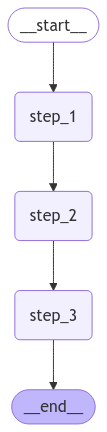

In [66]:
from IPython.display import Image, display

from typing_extensions import TypedDict
from langgraph.checkpoint.memory import MemorySaver
from langgraph.errors import NodeInterrupt
from langgraph.graph import START, END, StateGraph

class State(TypedDict):
    input: str

def step_1(state: State) -> State:
    print("---Step 1---")
    return state

def step_2(state: State) -> State:
    # Let's optionally raise a NodeInterrupt if the length of the input is longer than 5 characters
    if len(state['input']) > 5:
        raise NodeInterrupt(f"Received input that is longer than 5 characters: {state['input']}")
    
    print("---Step 2---")
    return state

def step_3(state: State) -> State:
    print("---Step 3---")
    return state

builder = StateGraph(State)
builder.add_node("step_1", step_1)
builder.add_node("step_2", step_2)
builder.add_node("step_3", step_3)
builder.add_edge(START, "step_1")
builder.add_edge("step_1", "step_2")
builder.add_edge("step_2", "step_3")
builder.add_edge("step_3", END)

# Set up memory
memory = MemorySaver()

# Compile the graph with memory
graph = builder.compile(checkpointer=memory)

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [67]:
initial_input = {"input": "hello world"}
thread_config = {"configurable": {"thread_id": "1"}}

# Run the graph until the first interruption
for event in graph.stream(initial_input, thread_config, stream_mode="values"):
    print(event)

{'input': 'hello world'}
---Step 1---
{'input': 'hello world'}


In [68]:
state = graph.get_state(thread_config)
print(state.next)

('step_2',)


In [69]:
print(state.tasks)

(PregelTask(id='283ce83a-d2bb-b65c-61b4-11273148beb5', name='step_2', path=('__pregel_pull', 'step_2'), error=None, interrupts=(Interrupt(value='Received input that is longer than 5 characters: hello world', resumable=False, ns=None, when='during'),), state=None, result=None),)


In [70]:
for event in graph.stream(None, thread_config, stream_mode="values"):
    print(event)

{'input': 'hello world'}


In [71]:
state = graph.get_state(thread_config)
print(state.next)

('step_2',)


In [72]:
graph.update_state(
    thread_config,
    {"input": "hi"},
)

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1efb62ca-d0d9-6d6a-8002-9ddb7d856334'}}

In [73]:
for event in graph.stream(None, thread_config, stream_mode="values"):
    print(event)

{'input': 'hi'}
---Step 2---
{'input': 'hi'}
---Step 3---
{'input': 'hi'}


# Time travel

In [75]:
from langchain_openai import ChatOpenAI

def multiply(a: int, b: int) -> int:
    """Multiply a and b.

    Args:
        a: first int
        b: second int
    """
    return a * b

# This will be a tool
def add(a: int, b: int) -> int:
    """Adds a and b.

    Args:
        a: first int
        b: second int
    """
    return a + b

def divide(a: int, b: int) -> float:
    """Adds a and b.

    Args:
        a: first int
        b: second int
    """
    return a / b

tools = [add, multiply, divide]
llm_with_tools = llm.bind_tools(tools)

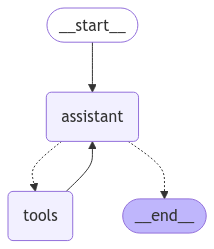

In [76]:
from IPython.display import Image, display

from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import MessagesState
from langgraph.graph import START, END, StateGraph
from langgraph.prebuilt import tools_condition, ToolNode

from langchain_core.messages import AIMessage, HumanMessage, SystemMessage

# System message
sys_msg = SystemMessage(content="You are a helpful assistant tasked with performing arithmetic on a set of inputs.")

# Node
def assistant(state: MessagesState):
   return {"messages": [llm_with_tools.invoke([sys_msg] + state["messages"])]}

# Graph
builder = StateGraph(MessagesState)

# Define nodes: these do the work
builder.add_node("assistant", assistant)
builder.add_node("tools", ToolNode(tools))

# Define edges: these determine the control flow
builder.add_edge(START, "assistant")
builder.add_conditional_edges(
    "assistant",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", "assistant")

memory = MemorySaver()
graph = builder.compile(checkpointer=MemorySaver())

# Show
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))

In [77]:
# Input
initial_input = {"messages": HumanMessage(content="Multiply 2 and 3")}

# Thread
thread = {"configurable": {"thread_id": "1"}}

# Run the graph until the first interruption
for event in graph.stream(initial_input, thread, stream_mode="values"):
    event['messages'][-1].pretty_print()

================================ Human Message =================================

Multiply 2 and 3
================================== Ai Message ==================================
Tool Calls:
  multiply (call_2C2b6sShNUXA6fI3ugV97O6f)
 Call ID: call_2C2b6sShNUXA6fI3ugV97O6f
  Args:
    a: 2
    b: 3
================================= Tool Message =================================
Name: multiply

6
================================== Ai Message ==================================

The result of multiplying 2 and 3 is 6.


In [78]:
graph.get_state({'configurable': {'thread_id': '1'}})

StateSnapshot(values={'messages': [HumanMessage(content='Multiply 2 and 3', additional_kwargs={}, response_metadata={}, id='dba0942f-7fb7-49ec-ac41-b8de3d7724d5'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_2C2b6sShNUXA6fI3ugV97O6f', 'function': {'arguments': '{"a":2,"b":3}', 'name': 'multiply'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 131, 'total_tokens': 148, 'completion_tokens_details': None, 'prompt_tokens_details': None}, 'model_name': 'gpt-4o-mini', 'system_fingerprint': 'fp_04751d0b65', 'finish_reason': 'tool_calls', 'logprobs': None, 'content_filter_results': {}}, id='run-99afaef2-a797-4433-abe4-d2faf7eb2176-0', tool_calls=[{'name': 'multiply', 'args': {'a': 2, 'b': 3}, 'id': 'call_2C2b6sShNUXA6fI3ugV97O6f', 'type': 'tool_call'}], usage_metadata={'input_tokens': 131, 'output_tokens': 17, 'total_tokens': 148, 'input_token_details': {}, 'output_token_details': {}}), ToolMessage(

In [80]:

all_states = [s for s in graph.get_state_history(thread)]

len(all_states)

5

In [96]:
all_states[-3].values

{'messages': [HumanMessage(content='Multiply 2 and 3', additional_kwargs={}, response_metadata={}, id='dba0942f-7fb7-49ec-ac41-b8de3d7724d5'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_2C2b6sShNUXA6fI3ugV97O6f', 'function': {'arguments': '{"a":2,"b":3}', 'name': 'multiply'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 131, 'total_tokens': 148, 'completion_tokens_details': None, 'prompt_tokens_details': None}, 'model_name': 'gpt-4o-mini', 'system_fingerprint': 'fp_04751d0b65', 'finish_reason': 'tool_calls', 'logprobs': None, 'content_filter_results': {}}, id='run-99afaef2-a797-4433-abe4-d2faf7eb2176-0', tool_calls=[{'name': 'multiply', 'args': {'a': 2, 'b': 3}, 'id': 'call_2C2b6sShNUXA6fI3ugV97O6f', 'type': 'tool_call'}], usage_metadata={'input_tokens': 131, 'output_tokens': 17, 'total_tokens': 148, 'input_token_details': {}, 'output_token_details': {}})]}

In [92]:
to_replay = all_states[-2]
to_replay

StateSnapshot(values={'messages': [HumanMessage(content='Multiply 2 and 3', additional_kwargs={}, response_metadata={}, id='dba0942f-7fb7-49ec-ac41-b8de3d7724d5')]}, next=('assistant',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1efb62d6-3398-6636-8000-8a33e2e7c533'}}, metadata={'source': 'loop', 'writes': None, 'thread_id': '1', 'step': 0, 'parents': {}}, created_at='2024-12-09T12:59:12.627256+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1efb62d6-338c-62dd-bfff-a0af23e2093f'}}, tasks=(PregelTask(id='3d1d1102-6496-8d30-fb54-0420f842a52f', name='assistant', path=('__pregel_pull', 'assistant'), error=None, interrupts=(), state=None, result={'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_2C2b6sShNUXA6fI3ugV97O6f', 'function': {'arguments': '{"a":2,"b":3}', 'name': 'multiply'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_t

In [93]:
to_replay.next

('assistant',)

In [94]:
to_replay.config

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1efb62d6-3398-6636-8000-8a33e2e7c533'}}

In [95]:
for event in graph.stream(None, to_replay.config, stream_mode="values"):
    event['messages'][-1].pretty_print()

================================ Human Message =================================

Multiply 2 and 3
================================== Ai Message ==================================
Tool Calls:
  multiply (call_xEjf6m1wt8Ehn14L0wdM48Jx)
 Call ID: call_xEjf6m1wt8Ehn14L0wdM48Jx
  Args:
    a: 2
    b: 3
================================= Tool Message =================================
Name: multiply

6
================================== Ai Message ==================================

The result of multiplying 2 and 3 is 6.


# Forking
What if we want to run from that same step, but with a different input.

In [97]:
to_fork = all_states[-2]
to_fork.values["messages"]

[HumanMessage(content='Multiply 2 and 3', additional_kwargs={}, response_metadata={}, id='dba0942f-7fb7-49ec-ac41-b8de3d7724d5')]

In [98]:
to_fork.config

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1efb62d6-3398-6636-8000-8a33e2e7c533'}}

In [99]:
fork_config = graph.update_state(
    to_fork.config,
    {"messages": [HumanMessage(content='Multiply 5 and 3', 
                               id=to_fork.values["messages"][0].id)]},
)

In [100]:
all_states = [state for state in graph.get_state_history(thread) ]
all_states[0].values["messages"]

[HumanMessage(content='Multiply 5 and 3', additional_kwargs={}, response_metadata={}, id='dba0942f-7fb7-49ec-ac41-b8de3d7724d5')]

In [101]:
graph.get_state({'configurable': {'thread_id': '1'}})

StateSnapshot(values={'messages': [HumanMessage(content='Multiply 5 and 3', additional_kwargs={}, response_metadata={}, id='dba0942f-7fb7-49ec-ac41-b8de3d7724d5')]}, next=('assistant',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1efb62ed-0b29-6ca9-8001-f820e3fb3a80'}}, metadata={'source': 'update', 'writes': {'__start__': {'messages': [HumanMessage(content='Multiply 5 and 3', additional_kwargs={}, response_metadata={}, id='dba0942f-7fb7-49ec-ac41-b8de3d7724d5')]}}, 'thread_id': '1', 'step': 1, 'parents': {}, 'checkpoint_ns': '', 'checkpoint_id': '1efb62d6-3398-6636-8000-8a33e2e7c533'}, created_at='2024-12-09T13:09:25.789200+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1efb62d6-3398-6636-8000-8a33e2e7c533'}}, tasks=(PregelTask(id='73f9c029-7883-73c0-ec04-2cb7dff25b4f', name='assistant', path=('__pregel_pull', 'assistant'), error=None, interrupts=(), state=None, result=None),))

In [102]:
for event in graph.stream(None, fork_config, stream_mode="values"):
    event['messages'][-1].pretty_print()

================================ Human Message =================================

Multiply 5 and 3
================================== Ai Message ==================================
Tool Calls:
  multiply (call_r9eYwivz85I5E7vW1pUR4DL9)
 Call ID: call_r9eYwivz85I5E7vW1pUR4DL9
  Args:
    a: 5
    b: 3
================================= Tool Message =================================
Name: multiply

15
================================== Ai Message ==================================

The result of multiplying 5 and 3 is 15.


In [103]:
graph.get_state({'configurable': {'thread_id': '1'}})

StateSnapshot(values={'messages': [HumanMessage(content='Multiply 5 and 3', additional_kwargs={}, response_metadata={}, id='dba0942f-7fb7-49ec-ac41-b8de3d7724d5'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_r9eYwivz85I5E7vW1pUR4DL9', 'function': {'arguments': '{"a":5,"b":3}', 'name': 'multiply'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 131, 'total_tokens': 148, 'completion_tokens_details': None, 'prompt_tokens_details': None}, 'model_name': 'gpt-4o-mini', 'system_fingerprint': 'fp_04751d0b65', 'finish_reason': 'tool_calls', 'logprobs': None, 'content_filter_results': {}}, id='run-16fb2179-9b43-469a-aa91-2d21e267f2eb-0', tool_calls=[{'name': 'multiply', 'args': {'a': 5, 'b': 3}, 'id': 'call_r9eYwivz85I5E7vW1pUR4DL9', 'type': 'tool_call'}], usage_metadata={'input_tokens': 131, 'output_tokens': 17, 'total_tokens': 148, 'input_token_details': {}, 'output_token_details': {}}), ToolMessage(

# Parallelism

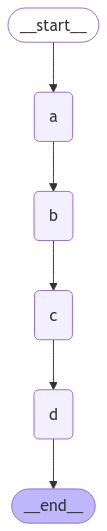

In [119]:
from IPython.display import Image, display

from typing import Any
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END

class State(TypedDict):
    # The operator.add reducer fn makes this append-only
    state: str

class ReturnNodeValue:
    def __init__(self, node_secret: str):
        self._value = node_secret

    def __call__(self, state: State) -> Any:
        print(f"Adding {self._value} to {state['state']}")
        return {"state": [self._value]}

# Add nodes
builder = StateGraph(State)

# Initialize each node with node_secret 
builder.add_node("a", ReturnNodeValue("I'm A"))
builder.add_node("b", ReturnNodeValue("I'm B"))
builder.add_node("c", ReturnNodeValue("I'm C"))
builder.add_node("d", ReturnNodeValue("I'm D"))

# Flow
builder.add_edge(START, "a")
builder.add_edge("a", "b")
builder.add_edge("b", "c")
builder.add_edge("c", "d")
builder.add_edge("d", END)
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [120]:
graph.invoke({"state": []})

Adding I'm A to []
Adding I'm B to ["I'm A"]
Adding I'm C to ["I'm B"]
Adding I'm D to ["I'm C"]


{'state': ["I'm D"]}

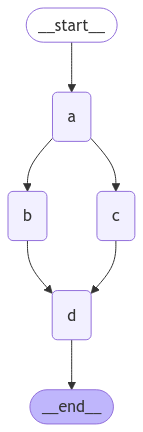

In [121]:
builder = StateGraph(State)

# Initialize each node with node_secret 
builder.add_node("a", ReturnNodeValue("I'm A"))
builder.add_node("b", ReturnNodeValue("I'm B"))
builder.add_node("c", ReturnNodeValue("I'm C"))
builder.add_node("d", ReturnNodeValue("I'm D"))

# Flow
builder.add_edge(START, "a")
builder.add_edge("a", "b")
builder.add_edge("a", "c")
builder.add_edge("b", "d")
builder.add_edge("c", "d")
builder.add_edge("d", END)
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [122]:
from langgraph.errors import InvalidUpdateError
try:
    graph.invoke({"state": []})
except InvalidUpdateError as e:
    print(f"An error occurred: {e}")

Adding I'm A to []
Adding I'm B to ["I'm A"]
Adding I'm C to ["I'm A"]
An error occurred: At key 'state': Can receive only one value per step. Use an Annotated key to handle multiple values.
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/INVALID_CONCURRENT_GRAPH_UPDATE


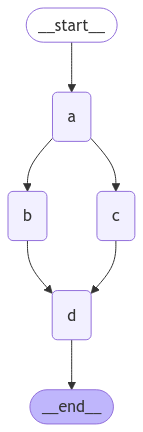

In [123]:
import operator
from typing import Annotated

class State(TypedDict):
    # The operator.add reducer fn makes this append-only
    state: Annotated[list, operator.add]

# Add nodes
builder = StateGraph(State)

# Initialize each node with node_secret 
builder.add_node("a", ReturnNodeValue("I'm A"))
builder.add_node("b", ReturnNodeValue("I'm B"))
builder.add_node("c", ReturnNodeValue("I'm C"))
builder.add_node("d", ReturnNodeValue("I'm D"))

# Flow
builder.add_edge(START, "a")
builder.add_edge("a", "b")
builder.add_edge("a", "c")
builder.add_edge("b", "d")
builder.add_edge("c", "d")
builder.add_edge("d", END)
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [124]:
graph.invoke({"state": []})

Adding I'm A to []
Adding I'm B to ["I'm A"]
Adding I'm C to ["I'm A"]
Adding I'm D to ["I'm A", "I'm B", "I'm C"]


{'state': ["I'm A", "I'm B", "I'm C", "I'm D"]}

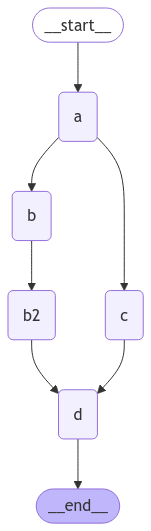

In [125]:
builder = StateGraph(State)

# Initialize each node with node_secret 
builder.add_node("a", ReturnNodeValue("I'm A"))
builder.add_node("b", ReturnNodeValue("I'm B"))
builder.add_node("b2", ReturnNodeValue("I'm B2"))
builder.add_node("c", ReturnNodeValue("I'm C"))
builder.add_node("d", ReturnNodeValue("I'm D"))

# Flow
builder.add_edge(START, "a")
builder.add_edge("a", "b")
builder.add_edge("a", "c")
builder.add_edge("b", "b2")
builder.add_edge(["b2", "c"], "d")
builder.add_edge("d", END)
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [126]:
graph.invoke({"state": []})

Adding I'm A to []
Adding I'm B to ["I'm A"]
Adding I'm C to ["I'm A"]
Adding I'm B2 to ["I'm A", "I'm B", "I'm C"]
Adding I'm D to ["I'm A", "I'm B", "I'm C", "I'm B2"]


{'state': ["I'm A", "I'm B", "I'm C", "I'm B2", "I'm D"]}

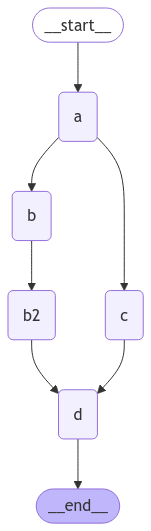

In [127]:
def sorting_reducer(left, right):
    """ Combines and sorts the values in a list"""
    if not isinstance(left, list):
        left = [left]

    if not isinstance(right, list):
        right = [right]
    
    return sorted(left + right, reverse=False)

class State(TypedDict):
    # sorting_reducer will sort the values in state
    state: Annotated[list, sorting_reducer]

# Add nodes
builder = StateGraph(State)

# Initialize each node with node_secret 
builder.add_node("a", ReturnNodeValue("I'm A"))
builder.add_node("b", ReturnNodeValue("I'm B"))
builder.add_node("b2", ReturnNodeValue("I'm B2"))
builder.add_node("c", ReturnNodeValue("I'm C"))
builder.add_node("d", ReturnNodeValue("I'm D"))

# Flow
builder.add_edge(START, "a")
builder.add_edge("a", "b")
builder.add_edge("a", "c")
builder.add_edge("b", "b2")
builder.add_edge(["b2", "c"], "d")
builder.add_edge("d", END)
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [128]:
graph.invoke({"state": []})

Adding I'm A to []
Adding I'm B to ["I'm A"]
Adding I'm C to ["I'm A"]
Adding I'm B2 to ["I'm A", "I'm B", "I'm C"]
Adding I'm D to ["I'm A", "I'm B", "I'm B2", "I'm C"]


{'state': ["I'm A", "I'm B", "I'm B2", "I'm C", "I'm D"]}

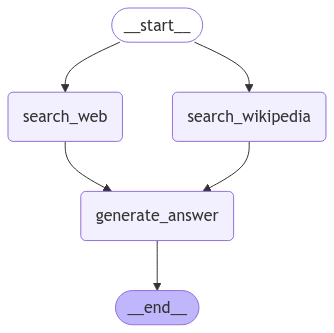

In [130]:
from langchain_core.messages import HumanMessage, SystemMessage

from langchain_community.document_loaders import WikipediaLoader
from langchain_community.tools import TavilySearchResults

def search_web(state):
    
    """ Retrieve docs from web search """

    # Search
    tavily_search = TavilySearchResults(max_results=3)
    search_docs = tavily_search.invoke(state['question'])

     # Format
    formatted_search_docs = "\n\n---\n\n".join(
        [
            f'<Document href="{doc["url"]}"/>\n{doc["content"]}\n</Document>'
            for doc in search_docs
        ]
    )

    return {"context": [formatted_search_docs]} 

def search_wikipedia(state):
    
    """ Retrieve docs from wikipedia """

    # Search
    search_docs = WikipediaLoader(query=state['question'], 
                                  load_max_docs=2).load()

     # Format
    formatted_search_docs = "\n\n---\n\n".join(
        [
            f'<Document source="{doc.metadata["source"]}" page="{doc.metadata.get("page", "")}"/>\n{doc.page_content}\n</Document>'
            for doc in search_docs
        ]
    )

    return {"context": [formatted_search_docs]} 

def generate_answer(state):
    
    """ Node to answer a question """

    # Get state
    context = state["context"]
    question = state["question"]

    # Template
    answer_template = """Answer the question {question} using this context: {context}"""
    answer_instructions = answer_template.format(question=question, 
                                                       context=context)    
    
    # Answer
    answer = llm.invoke([SystemMessage(content=answer_instructions)]+[HumanMessage(content=f"Answer the question.")])
      
    # Append it to state
    return {"answer": answer}

# Add nodes
builder = StateGraph(State)

# Initialize each node with node_secret 
builder.add_node("search_web",search_web)
builder.add_node("search_wikipedia", search_wikipedia)
builder.add_node("generate_answer", generate_answer)

# Flow
builder.add_edge(START, "search_wikipedia")
builder.add_edge(START, "search_web")
builder.add_edge("search_wikipedia", "generate_answer")
builder.add_edge("search_web", "generate_answer")
builder.add_edge("generate_answer", END)
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
result = graph.invoke({"question": "How were Nvidia's Q2 2024 earnings"})
result['answer'].content

# SUB GRAPH

In [132]:
from operator import add
from typing_extensions import TypedDict
from typing import List, Optional, Annotated

# The structure of the logs
class Log(TypedDict):
    id: str
    question: str
    docs: Optional[List]
    answer: str
    grade: Optional[int]
    grader: Optional[str]
    feedback: Optional[str]

C:\Users\SIVERMA\AppData\Local\Temp\ipykernel_24184\1870112535.py:28: LangGraphDeprecationWarning: Initializing StateGraph without state_schema is deprecated. Please pass in an explicit state_schema instead of just an input and output schema.
  fa_builder = StateGraph(input=FailureAnalysisState,output=FailureAnalysisOutputState)


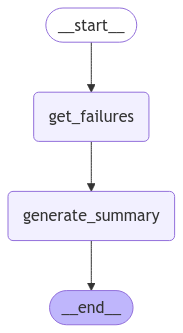

In [133]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

# Failure Analysis Sub-graph
class FailureAnalysisState(TypedDict):
    cleaned_logs: List[Log]
    failures: List[Log]
    fa_summary: str
    processed_logs: List[str]

class FailureAnalysisOutputState(TypedDict):
    fa_summary: str
    processed_logs: List[str]

def get_failures(state):
    """ Get logs that contain a failure """
    cleaned_logs = state["cleaned_logs"]
    failures = [log for log in cleaned_logs if "grade" in log]
    return {"failures": failures}

def generate_summary(state):
    """ Generate summary of failures """
    failures = state["failures"]
    # Add fxn: fa_summary = summarize(failures)
    fa_summary = "Poor quality retrieval of Chroma documentation."
    return {"fa_summary": fa_summary, "processed_logs": [f"failure-analysis-on-log-{failure['id']}" for failure in failures]}

fa_builder = StateGraph(input=FailureAnalysisState,output=FailureAnalysisOutputState)
fa_builder.add_node("get_failures", get_failures)
fa_builder.add_node("generate_summary", generate_summary)
fa_builder.add_edge(START, "get_failures")
fa_builder.add_edge("get_failures", "generate_summary")
fa_builder.add_edge("generate_summary", END)

graph = fa_builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

C:\Users\SIVERMA\AppData\Local\Temp\ipykernel_24184\1669619007.py:24: LangGraphDeprecationWarning: Initializing StateGraph without state_schema is deprecated. Please pass in an explicit state_schema instead of just an input and output schema.
  qs_builder = StateGraph(input=QuestionSummarizationState,output=QuestionSummarizationOutputState)


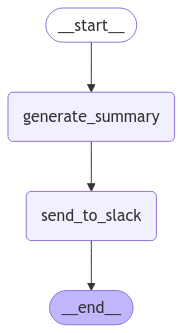

In [134]:
# Summarization subgraph
class QuestionSummarizationState(TypedDict):
    cleaned_logs: List[Log]
    qs_summary: str
    report: str
    processed_logs: List[str]

class QuestionSummarizationOutputState(TypedDict):
    report: str
    processed_logs: List[str]

def generate_summary(state):
    cleaned_logs = state["cleaned_logs"]
    # Add fxn: summary = summarize(generate_summary)
    summary = "Questions focused on usage of ChatOllama and Chroma vector store."
    return {"qs_summary": summary, "processed_logs": [f"summary-on-log-{log['id']}" for log in cleaned_logs]}

def send_to_slack(state):
    qs_summary = state["qs_summary"]
    # Add fxn: report = report_generation(qs_summary)
    report = "foo bar baz"
    return {"report": report}

qs_builder = StateGraph(input=QuestionSummarizationState,output=QuestionSummarizationOutputState)
qs_builder.add_node("generate_summary", generate_summary)
qs_builder.add_node("send_to_slack", send_to_slack)
qs_builder.add_edge(START, "generate_summary")
qs_builder.add_edge("generate_summary", "send_to_slack")
qs_builder.add_edge("send_to_slack", END)

graph = qs_builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [135]:
# Entry Graph
class EntryGraphState(TypedDict):
    raw_logs: List[Log]
    cleaned_logs: Annotated[List[Log], add] # This will be USED BY in BOTH sub-graphs
    fa_summary: str # This will only be generated in the FA sub-graph
    report: str # This will only be generated in the QS sub-graph
    processed_logs:  Annotated[List[int], add] # This will be generated in BOTH sub-graphs

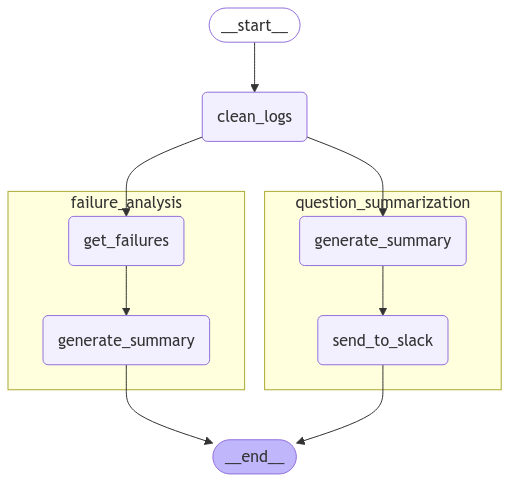

In [136]:
# Entry Graph
class EntryGraphState(TypedDict):
    raw_logs: List[Log]
    cleaned_logs: List[Log]
    fa_summary: str # This will only be generated in the FA sub-graph
    report: str # This will only be generated in the QS sub-graph
    processed_logs:  Annotated[List[int], add] # This will be generated in BOTH sub-graphs

def clean_logs(state):
    # Get logs
    raw_logs = state["raw_logs"]
    # Data cleaning raw_logs -> docs 
    cleaned_logs = raw_logs
    return {"cleaned_logs": cleaned_logs}

entry_builder = StateGraph(EntryGraphState)
entry_builder.add_node("clean_logs", clean_logs)
entry_builder.add_node("question_summarization", qs_builder.compile())
entry_builder.add_node("failure_analysis", fa_builder.compile())

entry_builder.add_edge(START, "clean_logs")
entry_builder.add_edge("clean_logs", "failure_analysis")
entry_builder.add_edge("clean_logs", "question_summarization")
entry_builder.add_edge("failure_analysis", END)
entry_builder.add_edge("question_summarization", END)

graph = entry_builder.compile()

from IPython.display import Image, display

# Setting xray to 1 will show the internal structure of the nested graph
display(Image(graph.get_graph(xray=1).draw_mermaid_png()))

In [137]:
# Dummy logs
question_answer = Log(
    id="1",
    question="How can I import ChatOllama?",
    answer="To import ChatOllama, use: 'from langchain_community.chat_models import ChatOllama.'",
)

question_answer_feedback = Log(
    id="2",
    question="How can I use Chroma vector store?",
    answer="To use Chroma, define: rag_chain = create_retrieval_chain(retriever, question_answer_chain).",
    grade=0,
    grader="Document Relevance Recall",
    feedback="The retrieved documents discuss vector stores in general, but not Chroma specifically",
)

raw_logs = [question_answer,question_answer_feedback]
graph.invoke({"raw_logs": raw_logs})

{'raw_logs': [{'id': '1',
   'question': 'How can I import ChatOllama?',
   'answer': "To import ChatOllama, use: 'from langchain_community.chat_models import ChatOllama.'"},
  {'id': '2',
   'question': 'How can I use Chroma vector store?',
   'answer': 'To use Chroma, define: rag_chain = create_retrieval_chain(retriever, question_answer_chain).',
   'grade': 0,
   'grader': 'Document Relevance Recall',
   'feedback': 'The retrieved documents discuss vector stores in general, but not Chroma specifically'}],
 'cleaned_logs': [{'id': '1',
   'question': 'How can I import ChatOllama?',
   'answer': "To import ChatOllama, use: 'from langchain_community.chat_models import ChatOllama.'"},
  {'id': '2',
   'question': 'How can I use Chroma vector store?',
   'answer': 'To use Chroma, define: rag_chain = create_retrieval_chain(retriever, question_answer_chain).',
   'grade': 0,
   'grader': 'Document Relevance Recall',
   'feedback': 'The retrieved documents discuss vector stores in general, 

# Map-reduce

In [9]:
from langchain_openai import ChatOpenAI

# Prompts we will use
subjects_prompt = """Generate a list of 3 sub-topics that are all related to this overall topic: {topic}."""
joke_prompt = """Generate a joke about {subject}"""
best_joke_prompt = """Below are a bunch of jokes about {topic}. Select the best one! Return the ID of the best one, starting 0 as the ID for the first joke. Jokes: \n\n  {jokes}"""

# LLM
model = llm

In [10]:
import operator
from typing import Annotated
from typing_extensions import TypedDict
from pydantic import BaseModel

class Subjects(BaseModel):
    subjects: list[str]

class BestJoke(BaseModel):
    id: int
    
class OverallState(TypedDict):
    topic: str
    subjects: list
    jokes: Annotated[list, operator.add]
    best_selected_joke: str

In [11]:
def generate_topics(state: OverallState):
    prompt = subjects_prompt.format(topic=state["topic"])
    response = model.with_structured_output(Subjects).invoke(prompt)
    return {"subjects": response.subjects}

In [12]:
from langgraph.constants import Send
def continue_to_jokes(state: OverallState):
    return [Send("generate_joke", {"subject": s}) for s in state["subjects"]]

In [13]:
class JokeState(TypedDict):
    subject: str

class Joke(BaseModel):
    joke: str

def generate_joke(state: JokeState):
    prompt = joke_prompt.format(subject=state["subject"])
    response = model.with_structured_output(Joke).invoke(prompt)
    return {"jokes": [response.joke]}

In [ ]:
def best_joke(state: OverallState):
    jokes = "\n\n".join(state["jokes"])
    prompt = best_joke_prompt.format(topic=state["topic"], jokes=jokes)
    response = model.with_structured_output(BestJoke).invoke(prompt)
    return {"best_selected_joke": state["jokes"][response.id]}


In [ ]:
from IPython.display import Image
from langgraph.graph import END, StateGraph, START

# Construct the graph: here we put everything together to construct our graph
graph = StateGraph(OverallState)
graph.add_node("generate_topics", generate_topics)
graph.add_node("generate_joke", generate_joke)
graph.add_node("best_joke", best_joke)



graph.add_edge(START, "generate_topics")
graph.add_conditional_edges("generate_topics", continue_to_jokes, ["generate_joke"])
graph.add_edge("generate_joke", "best_joke")
graph.add_edge("best_joke", END)


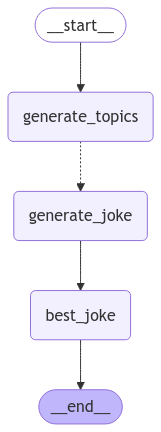

In [ ]:

# Compile the graph
app = graph.compile()
Image(app.get_graph().draw_mermaid_png())

In [ ]:

for s in app.stream({"topic": "animals"}):
    print(s)

{'generate_topics': {'subjects': ['animal behavior', 'habitats of animals', 'endangered species']}}
{'generate_joke': {'jokes': ["Why did the dog sit in the shade? Because he didn't want to become a hot dog!"]}}
{'generate_joke': {'jokes': ["Why did the animal refuse to live in the city? Because it couldn't find a suitable habitat and didn't want to be a 'city slicker'!"]}}
{'generate_joke': {'jokes': ['Why did the endangered species break up with their partner? Because they needed space to thrive!']}}
{'best_joke': {'best_selected_joke': "Why did the dog sit in the shade? Because he didn't want to become a hot dog!"}}


In [ ]:
app.invoke({"topic": "animals"})